<a href="https://colab.research.google.com/github/kojiyam/high_school/blob/main/HS_modulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shift+Enterで実行できます

# 0. 準備

In [ ]:
# 2021/8/1時点のGoogle Colabでは!pip show ipythonで5.5.0と出て，
# IPython.display.Audio(normalize=False)ができないので，アップデート
# 指示通り"Restart Runtime"必要
!pip install "ipython>=7"

In [ ]:
# 必要なライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 16
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["ps.fonttype"] = 42
from matplotlib import animation
import IPython.display

まず以下の説明必要

# 1.「ド」の音の再生（523 Hzの正弦波）

## 標本点の時刻

In [ ]:
# 音の保存のパラメータ（通信基礎論・情報伝送工学）
sampling_rate = 10000 # (Hz) 音を保存するときの標本化周波数
T_LENGTH = 10 # 音の時間長 (s)
t = np.arange( T_LENGTH * sampling_rate ) / sampling_rate # 標本化時刻

In [ ]:
print(t)

[0.0000e+00 1.0000e-04 2.0000e-04 ... 9.9997e+00 9.9998e+00 9.9999e+00]


In [ ]:
print(t[0], t[1], t[2])

0.0 0.0001 0.0002


$t_0 = 0,\ t_1 = 10^{-4},\ t_2 = 2 \cdot 10^{-4},\ \dots,\ t_k = k \cdot 10^{-4}$

sampling_rate = 10 kHz であれば，サンプリング間隔は100 μs = 0.1 ms = 10$^{-4}$ s

## 標本点での値

In [ ]:
# 搬送波のパラメータ
Ac = 0.5
fc = 523 # (Hz) Carrier frequency
s = Ac * np.cos( 2 * np.pi * fc * t )

$ s_k = A_\mathrm{c} \cos(2\pi f_\mathrm{c} t_k)$

どういうデータを使ったか可視化

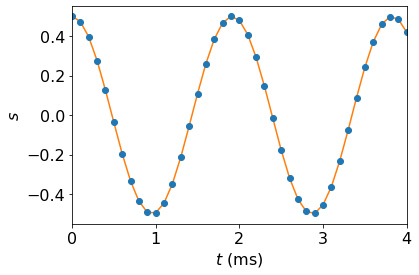

In [ ]:
plt.xlim(0,4)
plt.xlabel("$t$ (ms)")
plt.ylabel("$s$")
plt.plot(t*1000, s, '-', color="tab:orange") # 横軸を1000倍して，ms単位にしている
plt.plot(t*1000, s, 'o') # 横軸を1000倍して，ms単位にしている
# plt.savefig("HS_modulation_01.pdf", transparent=True, bbox_inches='tight')

In [ ]:
IPython.display.Audio(s, rate = sampling_rate, normalize=False)

## 少し違う周波数の音

In [ ]:
f2 = 525 # (Hz) Carrier frequency
s2 = Ac * np.cos( 2 * np.pi * f2 * t )

In [ ]:
IPython.display.Audio(s2, rate = sampling_rate, normalize=False)

□ 523 Hzと525 Hzの違いは分かりますか？

## 両方をあわせて聞いてみる

In [ ]:
s3 = s + s2
IPython.display.Audio(s3, rate = sampling_rate, normalize=False)

□ この現象は，何と呼ばれるか？

□ どのような数学公式で説明できるか？


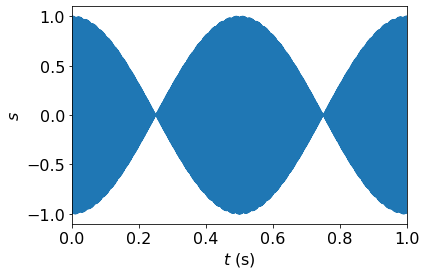

In [ ]:
plt.xlim(0,1)
plt.xlabel("$t$ (s)")
plt.ylabel("$s$")
plt.plot(t, s3, '-')

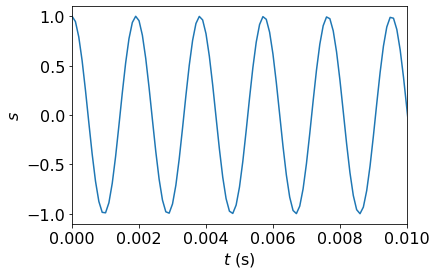

In [ ]:
plt.xlim(0,0.01)
plt.xlabel("$t$ (s)")
plt.ylabel("$s$")
plt.plot(t, s3, '-')

# 変調

In [ ]:
s4 = np.cos( 2 * np.pi * 2 * t )
s5 = s4 * s

In [ ]:
IPython.display.Audio(s5, rate = sampling_rate, normalize=False)

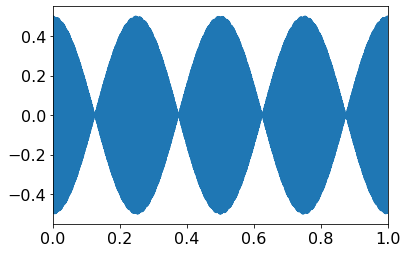

In [ ]:
plt.xlim(0,1)
plt.plot(t, s5)

## wavファイルとして保存

In [ ]:
from scipy.io.wavfile import write
from scipy.io.wavfile import read

In [ ]:
write('s5.wav', sampling_rate, s5)

# 受信

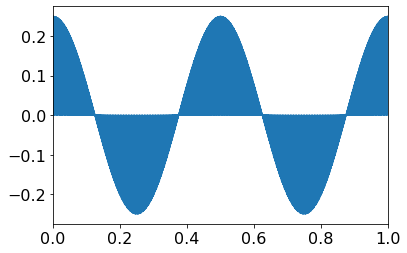

In [ ]:
plt.xlim(0,1)
plt.plot(t, s5*s)

In [ ]:
num = 10
b = np.ones(num)/num
s6 = np.convolve(s5*s, b, mode='same')

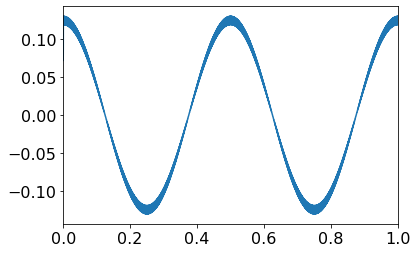

In [ ]:
plt.xlim(0,1)
plt.plot(t, s6)

## PSK32

In [ ]:
import wave

In [ ]:
# iOSアプリ PSKerの出力を録音したもの
!wget https://www.imc.cce.i.kyoto-u.ac.jp/~kyamamot/class/48k.wav

--2021-08-11 05:46:53--  https://www.imc.cce.i.kyoto-u.ac.jp/~kyamamot/class/48k.wav
Resolving www.imc.cce.i.kyoto-u.ac.jp (www.imc.cce.i.kyoto-u.ac.jp)... 133.242.249.164
Connecting to www.imc.cce.i.kyoto-u.ac.jp (www.imc.cce.i.kyoto-u.ac.jp)|133.242.249.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 192078 (188K) [audio/x-wav]
Saving to: ‘48k.wav’

48k.wav             100%[===================>] 187.58K   251KB/s    in 0.7s    

2021-08-11 05:46:55 (251 KB/s) - ‘48k.wav’ saved [192078/192078]



In [ ]:
sampling_rate2, data = read('48k.wav')
print(sampling_rate2)

48000


In [ ]:
IPython.display.Audio(data, rate = sampling_rate2, normalize=True)

In [ ]:
data.shape[0]

96000

In [ ]:
t2 = np.arange(data.shape[0])/sampling_rate2

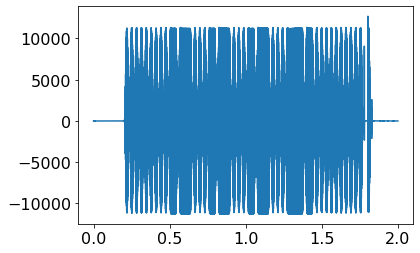

In [ ]:
plt.plot(t2, data)

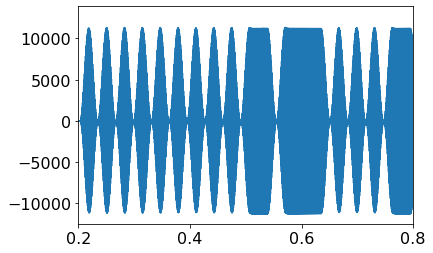

In [ ]:
plt.xlim(0.2,0.8)
plt.plot(t2, data)

In [ ]:
data2 = data*np.cos(2*np.pi*1500*t2)

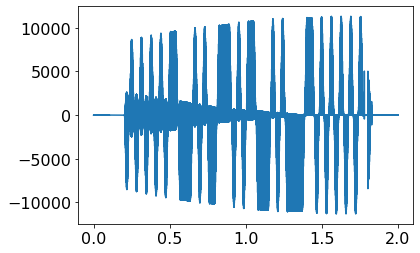

In [ ]:
plt.plot(t2, data2)

初期位相があっていない

送受信双方のクロックがあっていない

In [ ]:
cp_data = data*np.exp(-1j*2*np.pi*1499.887*t2)

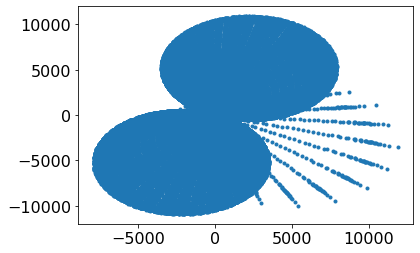

In [ ]:
plt.plot(np.real(cp_data), np.imag(cp_data), ".")

In [ ]:
num = 31
b = np.ones(num)/num
cp_data_ave = np.convolve(cp_data, b, mode='same')

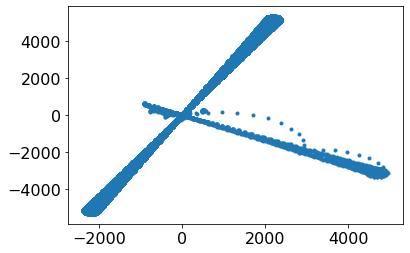

In [ ]:
plt.plot(np.real(cp_data_ave), np.imag(cp_data_ave), ".")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


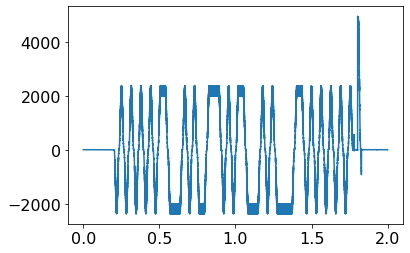

In [ ]:
plt.plot(t2, cp_data_ave)

## 補足

In [ ]:
S3 = np.fft.fft(s3)
freq = np.fft.fftfreq(s3.size, d=1/sampling_rate)

In [ ]:
plt.xlim(520,530)
plt.plot(freq, S3)